In [6]:
import scanpy as sc
import pandas as pd

adata = sc.read("/Users/randyramdial/Desktop/FoMR/Caron_Concatenated 2020.h5ad")
adata

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 25825 × 1762
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/randyramdial/anaconda3/envs/MEDI7281/lib/pyth

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


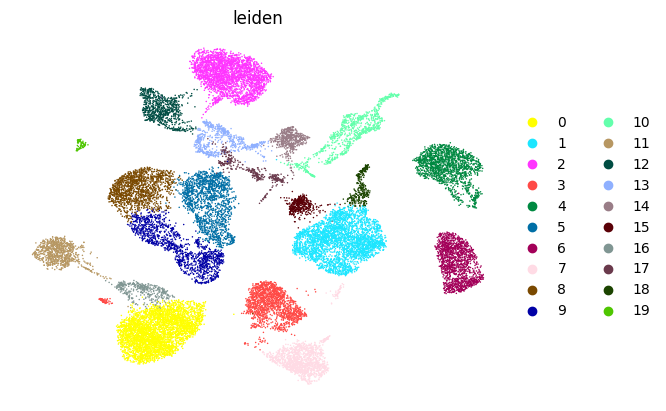

In [8]:
sc.pl.umap(adata, color = ['leiden'], frameon = False)

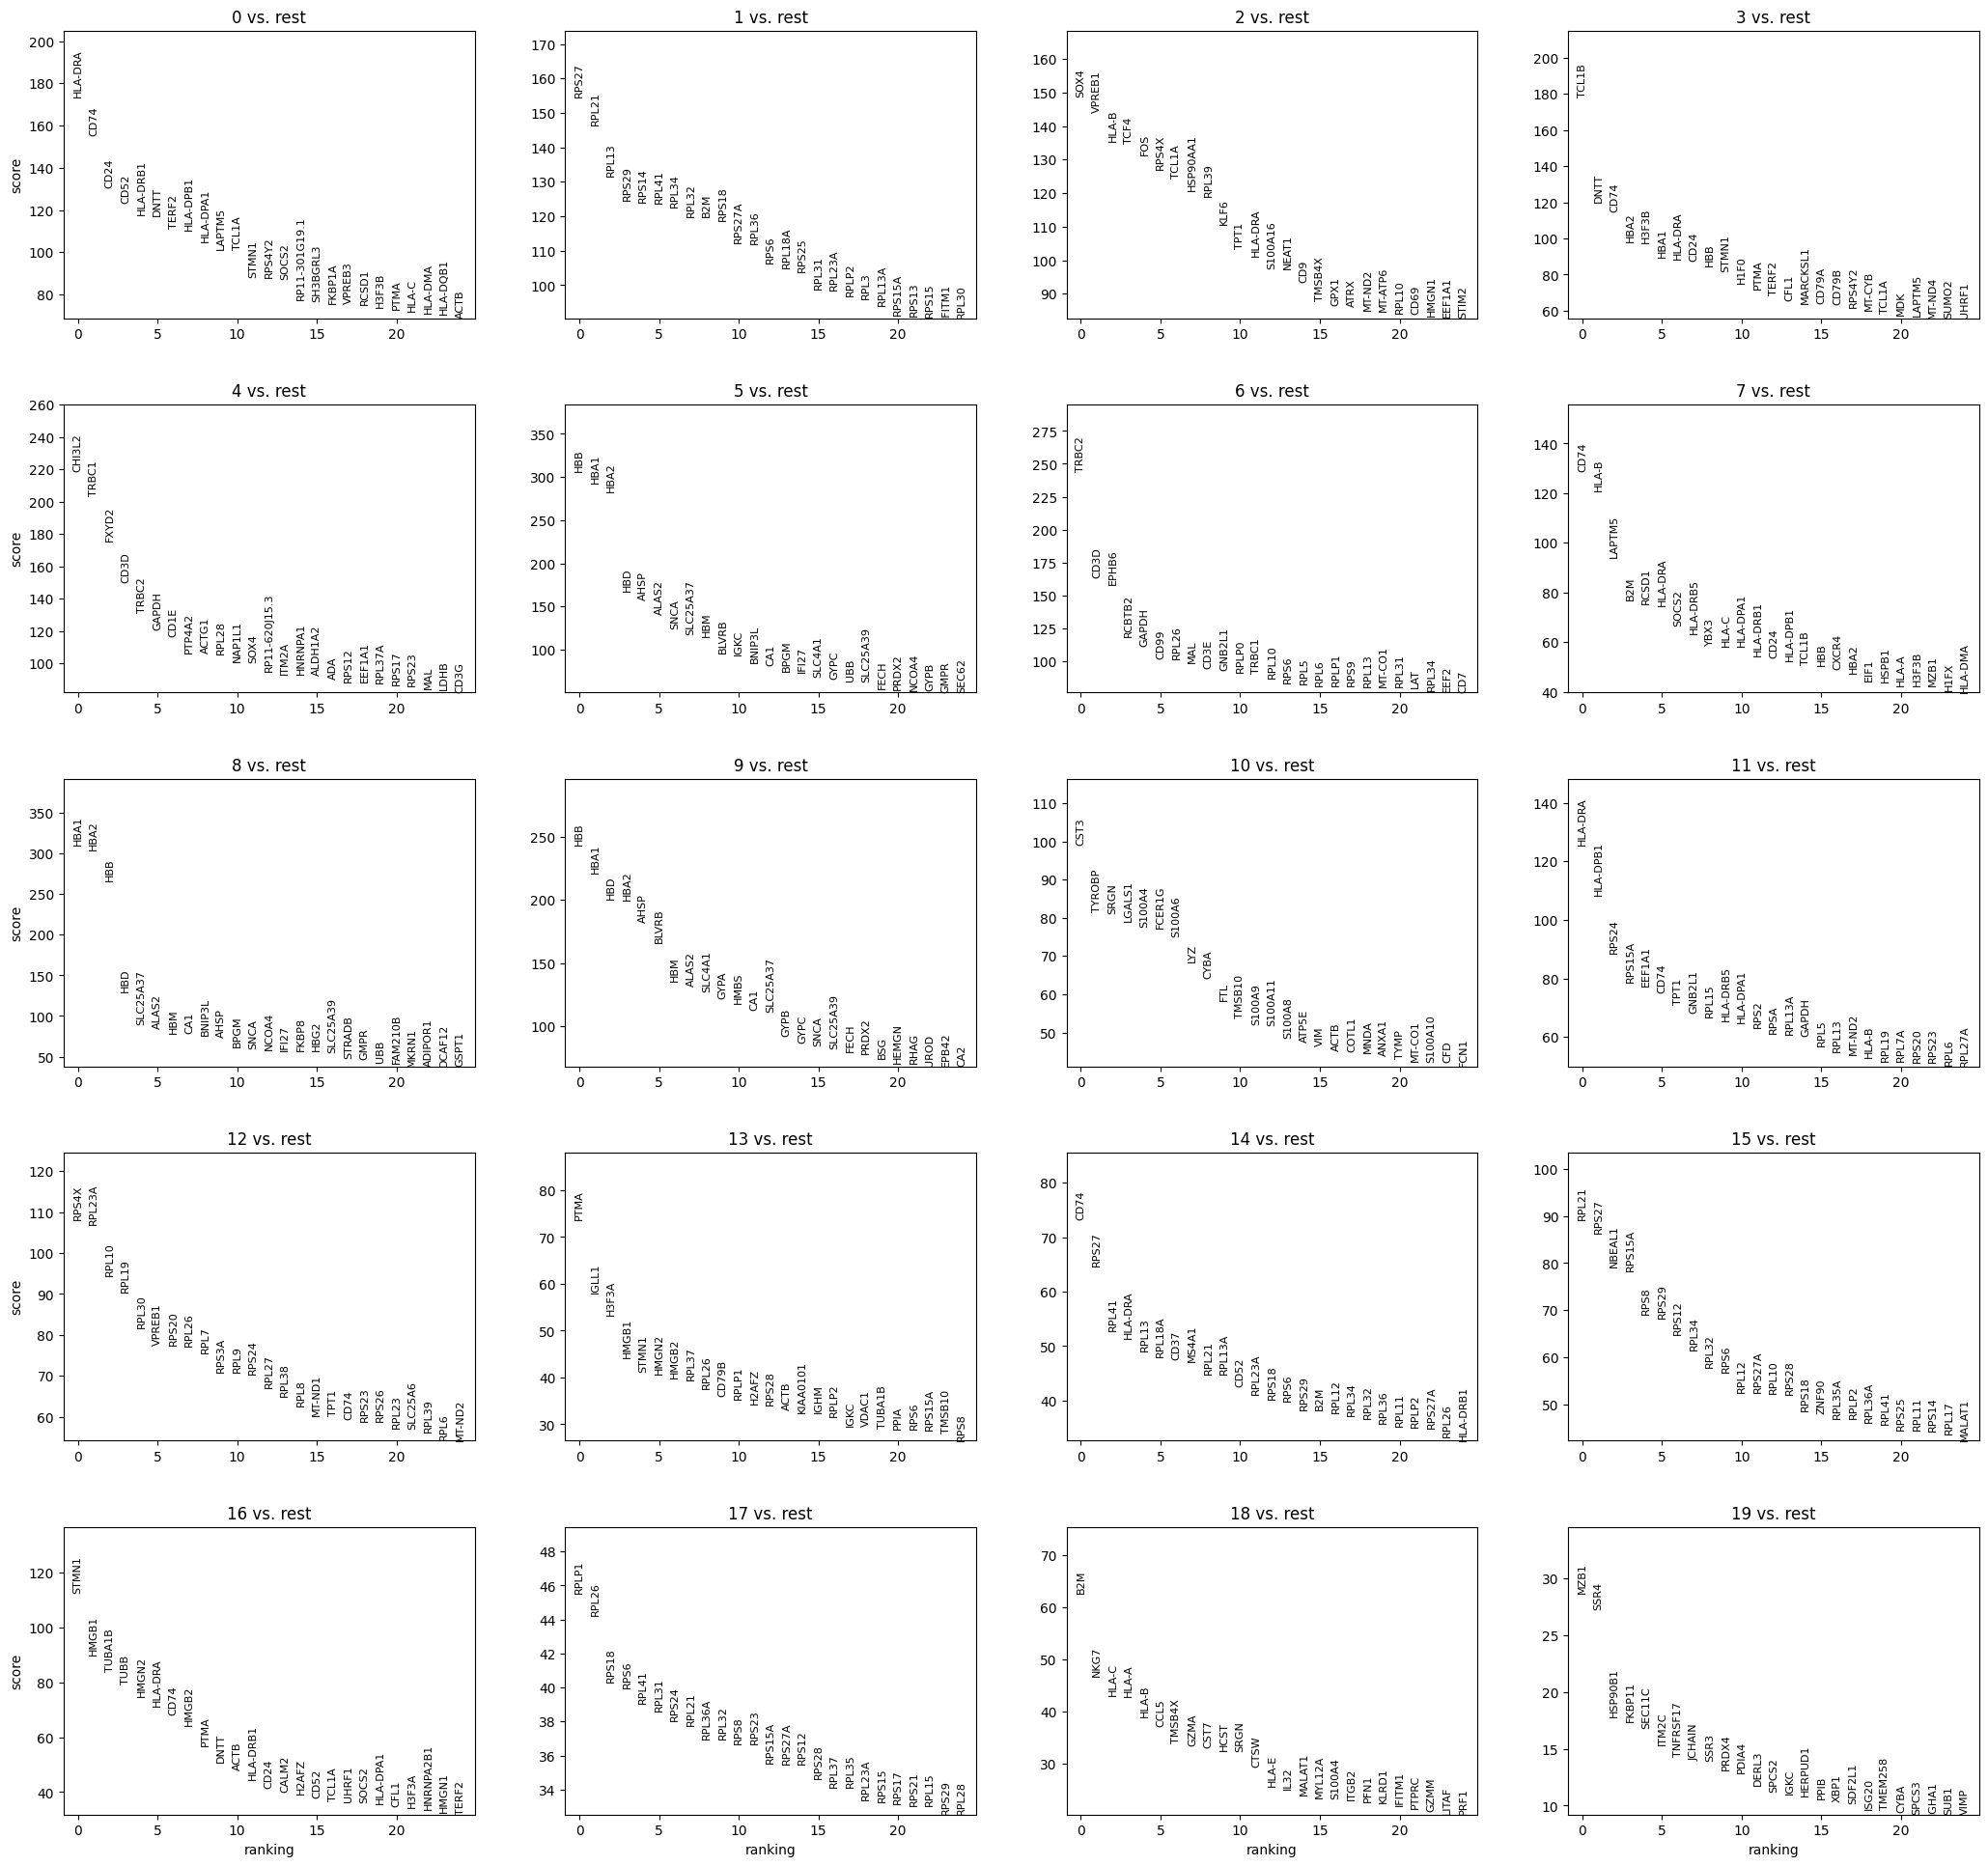

In [9]:
import numpy as np

# Manually adding 'base' to 'log1p' in adata.uns
adata.uns['log1p']['base'] = np.e  # Set this to the correct base used during log-normalization

# Now you can rerun the rank_genes_groups function
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [6]:
top_n_genes = 10
marker_genes_df = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(top_n_genes)
marker_genes_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,HLA-DRA,RPS27,SOX4,TCL1B,CHI3L2,HBB,TRBC2,CD74,HBA1,HBB,CST3,HLA-DRA,RPS4X,PTMA,CD74,RPL21,STMN1,RPLP1,B2M,MZB1
1,CD74,RPL21,VPREB1,DNTT,TRBC1,HBA1,CD3D,HLA-B,HBA2,HBA1,TYROBP,HLA-DPB1,RPL23A,IGLL1,RPS27,RPS27,HMGB1,RPL26,NKG7,SSR4
2,CD24,RPL13,HLA-B,CD74,FXYD2,HBA2,EPHB6,LAPTM5,HBB,HBD,SRGN,RPS24,RPL10,H3F3A,RPL41,NBEAL1,TUBA1B,RPS18,HLA-C,HSP90B1
3,CD52,RPS29,TCF4,HBA2,CD3D,HBD,RCBTB2,B2M,HBD,HBA2,LGALS1,RPS15A,RPL19,HMGB1,HLA-DRA,RPS15A,TUBB,RPS6,HLA-A,FKBP11
4,HLA-DRB1,RPS14,FOS,H3F3B,TRBC2,AHSP,GAPDH,RCSD1,SLC25A37,AHSP,S100A4,EEF1A1,RPL30,STMN1,RPL13,RPS8,HMGN2,RPL41,HLA-B,SEC11C
5,DNTT,RPL41,RPS4X,HBA1,GAPDH,ALAS2,CD99,HLA-DRA,ALAS2,BLVRB,FCER1G,CD74,VPREB1,HMGN2,RPL18A,RPS29,HLA-DRA,RPL31,CCL5,ITM2C
6,TERF2,RPL34,TCL1A,HLA-DRA,CD1E,SNCA,RPL26,SOCS2,HBM,HBM,S100A6,TPT1,RPS20,HMGB2,CD37,RPS12,CD74,RPS24,TMSB4X,TNFRSF17
7,HLA-DPB1,RPL32,HSP90AA1,CD24,PTP4A2,SLC25A37,MAL,HLA-DRB5,CA1,ALAS2,LYZ,GNB2L1,RPL26,RPL37,MS4A1,RPL34,HMGB2,RPL21,GZMA,JCHAIN
8,HLA-DPA1,B2M,RPL39,HBB,ACTG1,HBM,CD3E,YBX3,BNIP3L,SLC4A1,CYBA,RPL15,RPL7,RPL26,RPL21,RPL32,PTMA,RPL36A,CST7,SSR3
9,LAPTM5,RPS18,KLF6,STMN1,RPL28,BLVRB,GNB2L1,HLA-C,AHSP,GYPA,FTL,HLA-DRB5,RPS3A,CD79B,RPL13A,RPS6,DNTT,RPL32,HCST,PRDX4


In [10]:
from IPython.display import display, HTML
display(HTML(marker_genes_df.to_html(index=False)))

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
HLA-DRA,RPS27,SOX4,TCL1B,CHI3L2,HBB,TRBC2,CD74,HBA1,HBB,CST3,HLA-DRA,RPS4X,PTMA,CD74,RPL21,STMN1,RPLP1,B2M,MZB1
CD74,RPL21,VPREB1,DNTT,TRBC1,HBA1,CD3D,HLA-B,HBA2,HBA1,TYROBP,HLA-DPB1,RPL23A,IGLL1,RPS27,RPS27,HMGB1,RPL26,NKG7,SSR4
CD24,RPL13,HLA-B,CD74,FXYD2,HBA2,EPHB6,LAPTM5,HBB,HBD,SRGN,RPS24,RPL10,H3F3A,RPL41,NBEAL1,TUBA1B,RPS18,HLA-C,HSP90B1
CD52,RPS29,TCF4,HBA2,CD3D,HBD,RCBTB2,B2M,HBD,HBA2,LGALS1,RPS15A,RPL19,HMGB1,HLA-DRA,RPS15A,TUBB,RPS6,HLA-A,FKBP11
HLA-DRB1,RPS14,FOS,H3F3B,TRBC2,AHSP,GAPDH,RCSD1,SLC25A37,AHSP,S100A4,EEF1A1,RPL30,STMN1,RPL13,RPS8,HMGN2,RPL41,HLA-B,SEC11C
DNTT,RPL41,RPS4X,HBA1,GAPDH,ALAS2,CD99,HLA-DRA,ALAS2,BLVRB,FCER1G,CD74,VPREB1,HMGN2,RPL18A,RPS29,HLA-DRA,RPL31,CCL5,ITM2C
TERF2,RPL34,TCL1A,HLA-DRA,CD1E,SNCA,RPL26,SOCS2,HBM,HBM,S100A6,TPT1,RPS20,HMGB2,CD37,RPS12,CD74,RPS24,TMSB4X,TNFRSF17
HLA-DPB1,RPL32,HSP90AA1,CD24,PTP4A2,SLC25A37,MAL,HLA-DRB5,CA1,ALAS2,LYZ,GNB2L1,RPL26,RPL37,MS4A1,RPL34,HMGB2,RPL21,GZMA,JCHAIN
HLA-DPA1,B2M,RPL39,HBB,ACTG1,HBM,CD3E,YBX3,BNIP3L,SLC4A1,CYBA,RPL15,RPL7,RPL26,RPL21,RPL32,PTMA,RPL36A,CST7,SSR3
LAPTM5,RPS18,KLF6,STMN1,RPL28,BLVRB,GNB2L1,HLA-C,AHSP,GYPA,FTL,HLA-DRB5,RPS3A,CD79B,RPL13A,RPS6,DNTT,RPL32,HCST,PRDX4


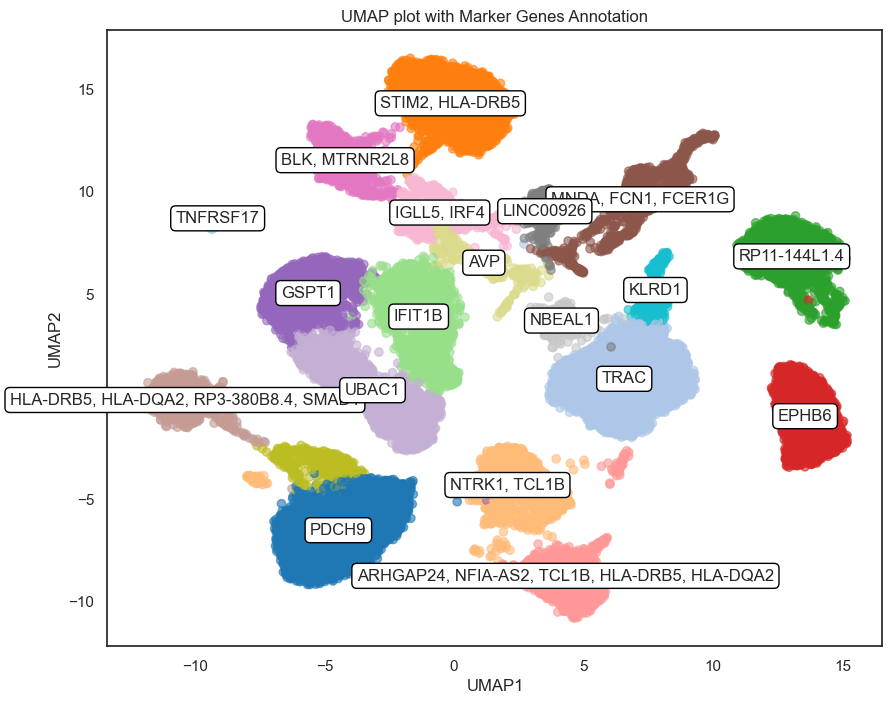

In [11]:
marker_genes_dict = {
    "0": "PDCH9",
    "1": "TRAC",
    "2": "STIM2, HLA-DRB5",
    "3": "NTRK1, TCL1B",
    "4": "RP11-144L1.4",
    "5": "IFIT1B",
    "6": "EPHB6",
    "7": "ARHGAP24, NFIA-AS2, TCL1B, HLA-DRB5, HLA-DQA2",
    "8": "GSPT1",
    "9": "UBAC1",
    "10": "MNDA, FCN1, FCER1G",
    "11": "HLA-DRB5, HLA-DQA2, RP3-380B8.4, SMAD1",
    "12": "BLK, MTRNR2L8",
    "13": "IGLL5, IRF4",
    "14": "LINC00926",
    "15": "NBEAL1",
    "16": "",
    "17": "AVP",
    "18": "KLRD1",
    "19": "TNFRSF17"
}
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style of the visualization
sns.set(style='white', rc={'figure.figsize':(10,8)})

# Create a scatter plot of the UMAP embeddings
scatter = plt.scatter(adata.obsm['X_umap'][:,0], adata.obsm['X_umap'][:,1], c=adata.obs['leiden'].astype(int), cmap='tab20', alpha=0.6)

# Calculate the centroid of each cluster and annotate with marker genes
for cluster in np.unique(adata.obs['leiden']):
    cluster_idx = np.where(adata.obs['leiden'] == cluster)[0]
    cluster_center = adata.obsm['X_umap'][cluster_idx, :].mean(axis=0)
    plt.text(cluster_center[0], cluster_center[1], marker_genes_dict[cluster], fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Show the plot
plt.title('UMAP plot with Marker Genes Annotation')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

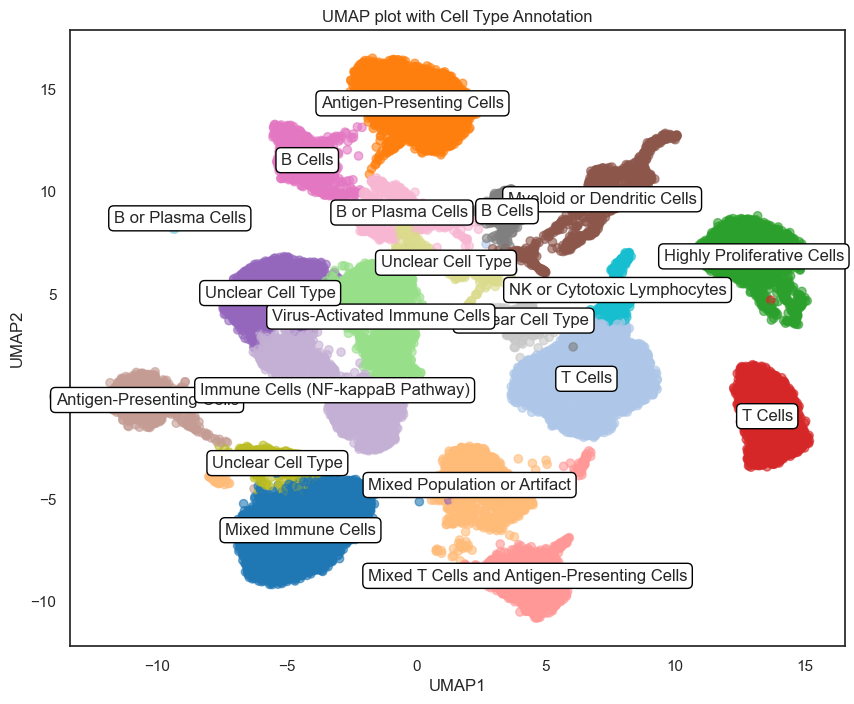

In [12]:
cell_type_dict = {
    "0": "Mixed Immune Cells",
    "1": "T Cells",
    "2": "Antigen-Presenting Cells",
    "3": "Mixed Population or Artifact",
    "4": "Highly Proliferative Cells",
    "5": "Virus-Activated Immune Cells",
    "6": "T Cells",
    "7": "Mixed T Cells and Antigen-Presenting Cells",
    "8": "Unclear Cell Type",
    "9": "Immune Cells (NF-kappaB Pathway)",
    "10": "Myeloid or Dendritic Cells",
    "11": "Antigen-Presenting Cells",
    "12": "B Cells",
    "13": "B or Plasma Cells",
    "14": "B Cells",
    "15": "Unclear Cell Type",
    "16": "Unclear Cell Type",
    "17": "Unclear Cell Type",
    "18": "NK or Cytotoxic Lymphocytes",
    "19": "B or Plasma Cells"
}
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style of the visualization
sns.set(style='white', rc={'figure.figsize':(10,8)})

# Create a scatter plot of the UMAP embeddings
scatter = plt.scatter(adata.obsm['X_umap'][:,0], adata.obsm['X_umap'][:,1], c=adata.obs['leiden'].astype(int), cmap='tab20', alpha=0.6)

# Calculate the centroid of each cluster and annotate with cell types
for cluster in np.unique(adata.obs['leiden']):
    cluster_idx = np.where(adata.obs['leiden'] == cluster)[0]
    cluster_center = adata.obsm['X_umap'][cluster_idx, :].mean(axis=0)
    plt.text(cluster_center[0], cluster_center[1], cell_type_dict[cluster], fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Show the plot
plt.title('UMAP plot with Cell Type Annotation')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


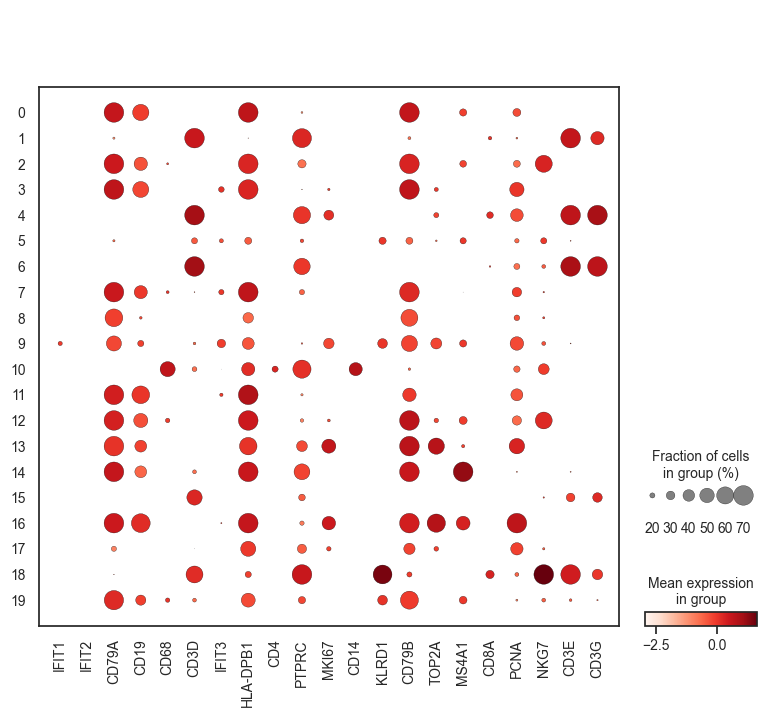

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


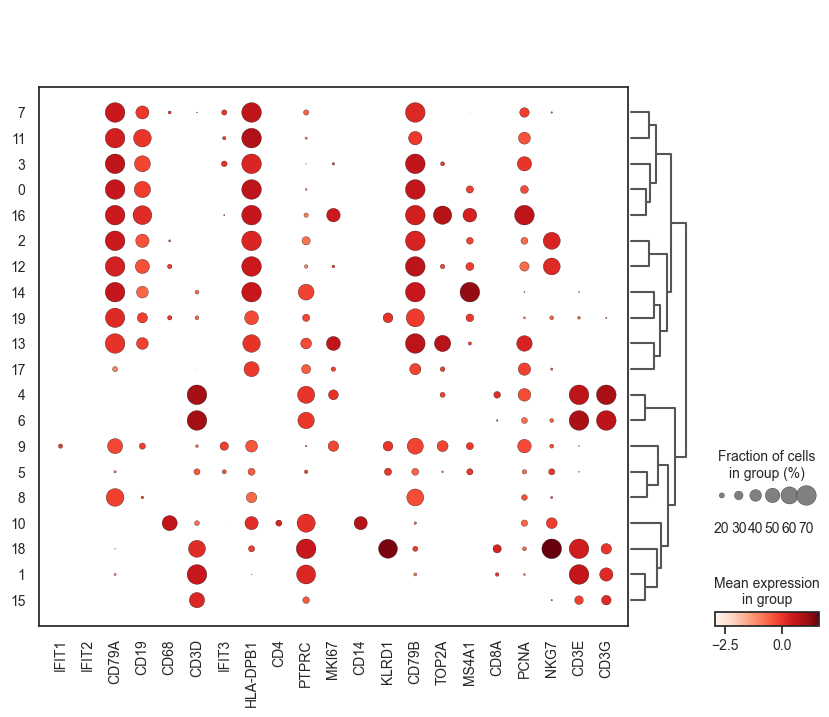

In [25]:
canonical_markers = {
    "T Cells": ["CD3D", "CD3E", "CD3G", "CD4", "CD8A"],
    "B Cells": ["CD19", "CD79A", "CD79B", "MS4A1"],
    "NK or Cytotoxic Lymphocytes": ["KLRD1", "NKG7"],
    "Myeloid or Dendritic Cells": ["CD14", "CD68"],
    "Antigen-Presenting Cells": ["HLA-DPB1"],
    "Virus-Activated Immune Cells": ["IFIT1", "IFIT2", "IFIT3"],
    "Mixed T Cells and Antigen-Presenting Cells": ["CD3D", "CD3E", "CD4", "CD8A", "HLA-DPB1"],
    "Mixed Immune Cells": ["PTPRC"],  # CD45 is a general marker for leukocytes
    "Highly Proliferative Cells": ["MKI67", "PCNA", "TOP2A"],  # Markers for proliferating cells
    "Mixed Population or Artifact": [],  # No specific markers as this is uncertain
    "Unclear Cell Type": []  # No specific markers as this is uncertain
}

#Convert the canonical markers dictionary to a format suitable for Scanpy's dotplot
genes = [gene for sublist in canonical_markers.values() for gene in sublist]
genes = list(set(genes))  # Remove duplicates

#Filter the genes to keep only those present in your data
sc.pl.dotplot(adata, var_names=genes, groupby='leiden', use_raw=False, log=True, dot_max=0.7, dot_min=0.1, color_map='Reds', dendrogram=False)

# Convert the canonical markers dictionary to a format suitable for Scanpy's dotplot
genes = [gene for sublist in canonical_markers.values() for gene in sublist]
genes = list(set(genes))  # Remove duplicates

# Filter the genes to keep only those present in your data
genes = [gene for gene in genes if gene in adata.var_names]

# Create a dot plot
sc.pl.dotplot(adata, var_names=genes, groupby='leiden', use_raw=False, log=True, dot_max=0.7, dot_min=0.1, color_map='Reds', dendrogram=True)

In [26]:
adata.write_h5ad("/Users/randyramdial/Desktop/FoMR/Caron-Test.h5ad")
adata


AnnData object with n_obs × n_vars = 25825 × 1762
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'